# OFFICE HOURS for 04/22/20

## Questions 

- outliers - when to address them?
    - Depends on model:
        - For tree-based models, outliers are not an issue.

-  graphviz visualization (random forests)
    - need to pull an individual forest
    
- roc/auc for multiclassification
    - use yellowbrick , sklearn does not work for multiclass

# Final Project Submission
* Student name: James M. Irivng, Ph.D.
* Student pace: full time
* Scheduled project review date/time: 05/15/19 2:30 pm
* Instructor name: Jeff Herman / Brandon Lewis
* Blog post URL:


## Iowa Prisoner Recidivism Data

- Source: https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison
- **Statistics about recidivism in prisoners from a 3 year prisoner**
- **Target:**
    - Recidivism - Return to Prison
- **Features:**
    - Fiscal Year Released
    - Recidivism Reporting Year
    - Race - Ethnicity
    - Age At Release
    - Convicting Offense Classification
    - Convicting Offense Type
    - Convicting Offense Subtype
    - Main Supervising District
    - Release Type
    - Release type: Paroled to Detainder united
    - Part of Target Population

<img src="LSA_map_with_counties_districts_and_B54A5BBCE4156.jpg" width=800>

### Detailed variable descriptions:

- **Fiscal Year Released**
    - Fiscal year (year ending June 30) for which the offender was released from prison.

- **Recidivism Reporting Year**
    - Fiscal year (year ending June 30) that marks the end of the 3-year tracking period. For example, offenders exited prison in FY 2012 are found in recidivism reporting year FY 2015.

- **Race - Ethnicity**
    - Offender's Race and Ethnicity

- **Convicting Offense Classification**
    - Maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days

- **Convicting Offense Type**
    - General category for the most serious offense for which the offender was placed in prison.

- **Convicting Offense Subtype**
    - Further classification of the most serious offense for which the offender was placed in prison.

- **Release Type**
    - Reasoning for Offender's release from prison.

- **Main Supervising District**
    - The Judicial District supervising the offender for the longest time during the tracking period.

- **Recidivism - Return to Prison**
    - No = No Recidivism; Yes = Prison admission for any reason within the 3-year tracking period
    
- **Part of Target Population** 
    - The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole and are part of the target population.
    ___

# USING THE OSEMN MODEL TO GUIDE WORKFLOW

1. **OBTAIN:**
    - [x] Import data, inspect, check for datatypes to convert and null values
<br><br>

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**<br>
    - Check and cast data types
    - [x] Check for missing values 
    - [x] Check for multicollinearity
    - [x] Normalize data (may want to do after some exploring)   
    <br><br>
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [x] Check scales, ranges (df.describe())
    - [x] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform
    - [x] Use scatterplots to check for linearity and possible categorical variables (df.plot(kind-'scatter')
    <br><br>

   
4. **FIT AN INITIAL MODEL:** 
    - [x] Assess the model.
        <br><br>
5. **REVISE THE FITTED MODEL**
    - [x] Adjust chosen model and hyper-parameters
    <br><br>
6. **HOLDOUT VALIDATION**
    - [ ] Perform cross-validation
___

# OBTAIN:
## Importing Packages

### Using Custom PyPi Package - BroadSteel DataScience (bs_ds)


<img src="https://bs-ds.readthedocs.io/en/latest/_images/bs_ds_logo.png" width=200>

- **Used several EDA functions from bs_ds.bamboo module:**
    - inspect_df
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.inspect_df
    - check_null
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_null
    - check_unique
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_unique
    - check_column
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_column
    - check_numeric
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.check_numeric
    - big_pandas
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.big_pandas
    - ignore_warnings
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.ignore_warnings
    - drop_cols
        - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bamboo.drop_cols

In [1]:
# Import custom python package BroadSteel DataScience (bs_ds_)
from bs_ds.imports import *
from bs_ds.bamboo import inspect_df, check_null, check_unique, check_column, check_numeric, big_pandas, ignore_warnings

bs_ds  v0.11.0 loaded.  Read the docs: https://bs-ds.readthedocs.io/en/latest/index.html
> For convenient loading of standard modules use: `from bs_ds.imports import *`



Package,Handle,Description
bs_ds,bs,Custom data science bootcamp student package
matplotlib,mpl,Matplotlib's base OOP module with formatting artists
matplotlib.pyplot,plt,Matplotlib's matlab-like plotting module
numpy,np,scientific computing with Python
pandas,pd,High performance data structures and tools
seaborn,sns,High-level data visualization library based on matplotlib


In [2]:
# Enabling full-sized dataframes and info rows
big_pandas()

# Turning off warnings for function deprecations
ignore_warnings()

# Defining colorscheme for notebook
plt.style.use('dark_background')

# Adding CSS styled tables 
from bs_ds.prettypandas import *

## Loading the dataset and removing unrelated columns

In [3]:
# Dataset Links
full_all_prisoners_file = "datasets/FULL_3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv"
# only_repeat_criminals_w_new_crime_file= "datasets/prison_recidivists_with_recidivism_type_only.csv"

In [4]:
# Will be using the all_prisoners file to predict recidivism
df = pd.read_csv(full_all_prisoners_file)

**Any columns that are about New Convictions or days to recidivism should be dropped for our initial model predicting recidivism.**
- "New..", "Days to Recividism"

In [5]:
from bs_ds.bamboo import drop_cols
df = drop_cols(df, ['New','Days','Recidivism Type'])

### Save original names vs short names in column_legend
- then map names onto columns

In [6]:
print(df.columns)

Index(['Fiscal Year Released', 'Recidivism Reporting Year', 'Race - Ethnicity',
       'Age At Release ', 'Convicting Offense Classification',
       'Convicting Offense Type', 'Convicting Offense Subtype', 'Release Type',
       'Main Supervising District', 'Recidivism - Return to Prison',
       'Part of Target Population', 'Sex'],
      dtype='object')


In [7]:
# New short-hand names to use
colnames_short = ('yr_released','report_year','race_ethnicity',
                  'age_released','crime_class','crime_type',
                  'crime_subtype','release_type','super_dist',
                  'recidivist','target_pop','sex')

# Zipping the original and new into a renaming dictionary
column_legend = dict(zip(df.columns,colnames_short))
# Rename df with shorter names
df.rename(mapper=column_legend, axis=1, inplace=True)
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black - Non-Hispanic,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White - Non-Hispanic,25-34,D Felony,Property,Theft,Discharged – End of Sentence,NaN,Yes,No,Male
2,2010,2013,White - Non-Hispanic,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White - Non-Hispanic,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black - Non-Hispanic,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,NaN,Yes,No,Male


# SCRUB / EXPLORE
## EDA with Pandas_Profiling

In [8]:
import pandas_profiling as pp

In [9]:
pp.ProfileReport(df)

## ADDRESSING NULL VALUES

In [11]:
# check_null(df)

**Results of Null Check**
- race_ethnicity has 30 (0.12% of data)
    -  drop
- age_released has 3 (0.01% of data)
    - drop
- sex has 3 (0.01% of data)
    - drop
- super_district has 9581(36.82% of data)
    - replace with "unknown"
- release_type has 1762 (6.77% of data)
    - drop
    
**Dropping all null values from age_released, race_ethnicity, and release_type.**

In [12]:
from bs_ds import prettypandas as pp
pp.html_on(CSS=['body{ text-align: center}'])

In [16]:
# inspect_df(df)

In [17]:
# Filling NA's in super_dist and release_type
df.dropna(subset=['age_released','race_ethnicity','sex','release_type'],inplace=True)
df['super_dist'].fillna("unknown", inplace=True)
# check_null(df)

___
## COMBINING AND REMAPPING CLASSES

### df['race_ethnicity']

In [18]:
# check_unique(df,['race_ethnicity'])

- **Remapping race_ethnicity**
    - Due to the low numbers for several of the race_ethnicity types, reducing and combining Hispanic and Non-Hispanic groups
    - Alternative approach of separating race and ethnicity into 2 separate features was rejected after modeling

In [19]:
# Defining Dictionary Map for race_ethnicity categories
race_ethnicity_map = {'White - Non-Hispanic':'White',
                        'Black - Non-Hispanic': 'Black',
                        'White - Hispanic' : 'Hispanic',
                        'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
                        'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
                        'Black - Hispanic' : 'Black',
                        'American Indian or Alaska Native - Hispanic':'American Native',
                        'White -' : 'White',
                        'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
                        'N/A -' : np.nan,
                        'Black -':'Black'}

# Replacing original race_ethnicity column with remapped one.
df['race_ethnicity'] = df['race_ethnicity'].map(race_ethnicity_map)

In [20]:
df.head()

,yr_released,report_year,race_ethnicity,age_released,crime_class,crime_type,crime_subtype,release_type,super_dist,recidivist,target_pop,sex
0,2010,2013,Black,25-34,C Felony,Violent,Robbery,Parole,7JD,Yes,Yes,Male
1,2010,2013,White,25-34,D Felony,Property,Theft,Discharged – End of Sentence,unknown,Yes,No,Male
2,2010,2013,White,35-44,B Felony,Drug,Trafficking,Parole,5JD,Yes,Yes,Male
3,2010,2013,White,25-34,B Felony,Other,Other Criminal,Parole,6JD,No,Yes,Male
4,2010,2013,Black,35-44,D Felony,Violent,Assault,Discharged – End of Sentence,unknown,Yes,No,Male


In [21]:
# check_unique(df,['race_ethnicity'])

### df['crime_class']

- **Remapping crime_class**
    - Combine 'Other Felony' and 'Other Felony (Old Code)' -> nan
    - Other Misdemeanor -> np.nan
    - Felony - Mandatory Minimum -> np.nan
    - Special Sentence 2005 -> Sex Offender
    - 'Sexual Predator Community Supervision' -> 'Sex Offender'
    - Other Felony -> np.nan    

In [22]:
check_unique(df,['crime_class'])


---------------------------

crime_class Type: object
Number unique values: 14.


,crime_class
D Felony,9786
C Felony,6453
Aggravated Misdemeanor,4327
B Felony,1716
Felony - Enhancement to Original Penalty,1488
Felony - Enhanced,220
Serious Misdemeanor,139
Special Sentence 2005,69
Felony - Mandatory Minimum,10
Other Felony,6


In [23]:
# Remapping
crime_class_map = {'Other Felony (Old Code)': np.nan ,#or other felony
                  'Other Misdemeanor':np.nan,
                   'Felony - Mandatory Minimum':np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : np.nan ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['crime_class'] = df['crime_class'].map(crime_class_map)

### df['age_released']

- **Encoding age groups as ordinal**

In [24]:
# Encoding age groups as ordinal
age_ranges = ('Under 25','25-34', '35-44','45-54','55 and Older')
age_codes = (0,1,2,3,4) 
# Zipping into Dictionary to Map onto Column
age_map = dict(zip(age_ranges,age_codes))

# Mapping age_map onto 'age_released'
df['age_released'] = df['age_released'].map(age_map)

### Remapping binary categories df[['recidivist','target_pop','sex']]

In [25]:
## Remapping binary categories

# Recidivist
recidivist_map = {'No':0,'Yes':1}
df['recidivist'] = df['recidivist'].map(recidivist_map)

# Target_pop
target_pop_map = {'No':0,'Yes':1}
df['target_pop'] = df['target_pop'].map(target_pop_map)

#sex_map
sex_map = {'Male':0,'Female':1}
df['sex'] = df['sex'].map(sex_map)

___
## ENGINEERING FEATURES
- **Engineering a simple 'felony' true false category**
- **Combining crime_type and crime_subtype into types_combined**

### Creating a simple 'felony' feature

In [26]:
# Engineering a simple 'felony' true false category
df['felony'] = df['crime_class'].str.contains('felony',case=False)
df['crime_types_combined'] = df['crime_type']+'_'+df['crime_subtype']
# Combining crime_type and crime_subtype into types_combined
df['crime_class_type_subtype']= df['crime_class']+'_'+df['crime_type']+'_'+df['crime_subtype']

### Creating a 'max_sentence' feature based on crime class max penalties
   

In [27]:
# Mapping years onto crime class
crime_class_max_sentence_map = {'A Felony': 75,  # Life
                                'Aggravated Misdemeanor': 2, # 2 years
                                'B Felony': 50, # 25 or 50 years
                                'C Felony': 10, # 10 years
                                'D Felony': 5,  # 5 yeras
                                'Felony - Enhanced': 10, # Add on to class C and D felonies, hard to approximate. 
                                'Serious Misdemeanor': 1, # 1 year
                                'Sex Offender': 10, # 10 years
                                'Simple Misdemeanor': 0.83} # 30 days

# Mapping max_sentence_column
df['max_sentence'] =df['crime_class'].map(crime_class_max_sentence_map)

### Dropping all  values replaced with np.nan

In [28]:
check_null(df)

TypeError: type object argument after ** must be a mapping, not NoneType

In [30]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
# check_null(df)

In [ ]:
df.to_csv('Iowa_recidivism_features_pre-processing.csv')

## Processing Chosen Feature Columns

In [31]:
# List of features to be analyzed as categories
category_cols = ['yr_released','race_ethnicity', 'crime_class',
                 'release_type','crime_type','crime_subtype',
                 'target_pop','sex','super_dist','felony']

# List of features to be analzyed as numbers
number_cols = ['max_sentence','age_released']

# Target feature
target_col = ['recidivist']

In [32]:
# Creating new dataframe ('df_to_split') to contain processed features for train_test_split
df_to_split=pd.DataFrame()

# MinMaxing Numerical Columns
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()

for header in number_cols:
    print(header)
    data = np.array(df[header])
    res = sca.fit_transform(data.reshape(-1,1))
    df_to_split[header] = res.ravel()    

max_sentence
age_released


In [33]:
# Convert categories to cat.codes
for header in category_cols:
    df_to_split[header] = df[header].astype('category').cat.codes
    
df_to_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24206 entries, 0 to 24205
Data columns (total 12 columns):
max_sentence      24206 non-null float64
age_released      24206 non-null float64
yr_released       24206 non-null int8
race_ethnicity    24206 non-null int8
crime_class       24206 non-null int8
release_type      24206 non-null int8
crime_type        24206 non-null int8
crime_subtype     24206 non-null int8
target_pop        24206 non-null int8
sex               24206 non-null int8
super_dist        24206 non-null int8
felony            24206 non-null int8
dtypes: float64(2), int8(10)
memory usage: 614.7 KB


# FITTING AN INITIAL MODEL
## Surveying Potential Algorithms with bs_ds
- select_pca:
    - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bs_ds.select_pca
- thick_pipe:
    - https://bs-ds.readthedocs.io/en/latest/bs_ds.html#bs_ds.bs_ds.thick_pipe


In [34]:
# from bs_ds.bs_ds import select_pca, thick_pipe

ImportError: cannot import name 'select_pca'

In [35]:
X =pd.get_dummies(df_to_split, columns=category_cols, drop_first=True)
y = df['recidivist']

In [36]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)

#### Running select_pca to identify # of components that still explains 80% of variance

In [ ]:
# select_pca(X_train) #,n_components_list=[range(10, X_train.shape[1]-1)])

In [ ]:
# Running thick_pipe to test alogorithms
# thick_pipe(X_train, y_train, n_components=17)

### >>> Fast-Forwarding through trial and error:
- Regardless of changes to preprocessing and feature engineering, accuracy scores never increased about 0.68
- One major concern was the vast majority of our features are categorical.
    - Therefore, we investigated using another Machine Learning package, **CatBoost**

## FITTING AN INITIAL MODEL USING CatBoostClassifier

In [37]:
# Define X and y to split
X = df_to_split
y = pd.Series(df[target_col].to_numpy().ravel())
y.name = 'recidivist'

In [38]:
# Split into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [39]:
# Import catboost Pool to create training and testing pools
from catboost import Pool, CatBoostClassifier

train_pool =  Pool(data=X_train, label=y_train, cat_features=category_cols)
test_pool = Pool(data=X_test, label=y_test,  cat_features=category_cols)

In [40]:
# Instantiating CatBoostClassifier 
cb_base = CatBoostClassifier(iterations=500, depth=12,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                            silent=True,
                            allow_const_label=True)#,
                           #task_type='GPU')

In [43]:
# Fitting Initial CatBoost Model
cb_base.fit(train_pool,eval_set=test_pool, plot=True, early_stopping_rounds=10)
cb_base.best_score_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.6302746906635777},
 'validation': {'Logloss': 0.6353375293395374, 'AUC': 0.6519075446148447}}

In [44]:
# catboost.core.CatBoostClassifier
# help(cb_base.get_params())

### VISUAL SUMMARY OF BASE MODEL

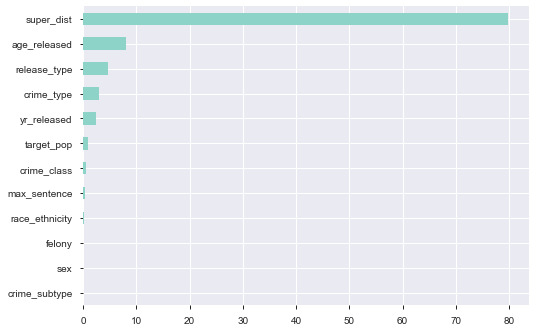

In [45]:
# Plotting Feature Importances
important_feature_names = cb_base.feature_names_
important_feature_scores = cb_base.feature_importances_

important_features = pd.Series(important_feature_scores, index = important_feature_names)
important_features.sort_values().plot(kind='barh')

#### Defining Roc_Auc Curve

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve

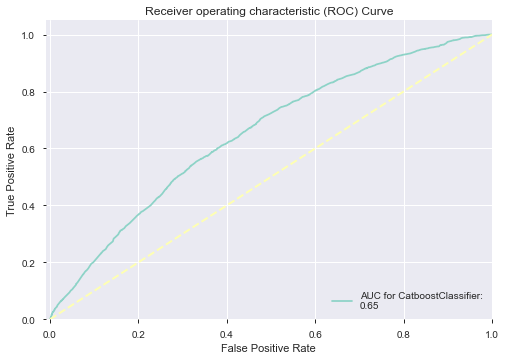

In [47]:
# Define plot_auc_roc_curve
def plot_auc_roc_curve(y_test, y_test_pred):
    """ Takes y_test and y_test_pred from a ML model and plots the AUC-ROC curve."""
    auc = roc_auc_score(y_test, y_test_pred[:,1])

    FPr, TPr, thresh  = roc_curve(y_test, y_test_pred[:,1])
    plt.plot(FPr, TPr,label=f"AUC for CatboostClassifier:\n{round(auc,2)}" )

    plt.plot([0, 1], [0, 1],  lw=2,linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.05])

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Plot roc_auc_curve
y_test_pred = cb_base.predict_proba(X_test)
plot_auc_roc_curve(y_test, y_test_pred)

Normalized confusion matrix
[[1.00000000e+00 0.00000000e+00]
 [9.99705102e-01 2.94898260e-04]]


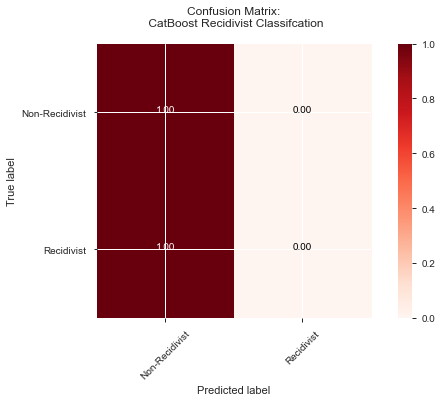

In [48]:
import itertools
from bs_ds.bs_ds import plot_confusion_matrix
y_test_pred = cb_base.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(conf_matrix, classes=['Non-Recidivist', 'Recidivist'], normalize=True, cmap='Reds',
                      title='Confusion Matrix:\n CatBoost Recidivist Classifcation\n')

### Notes Following Initial Modeling:
- The ROC-AUC Curve Shows that our model performs better than chance. 
- HOWEVE, There is a major issue with our confusion matrix.
    - There are an extremely high # of False Negatives (prisoners Predicted to be "Non-Recidivist",but were actually "Recidivist")
    - This is a serious flaw with the model and serious hinders real-world applicability. 
- This may be due to the imbalance of cases of recidivists vs non-recidivists in our dataset.

# REVISING THE MODEL
## Balancing Target Classes Using Synthetic Minority Oversampling

In [49]:
# Define X and y 
X = df_to_split
y = pd.Series(df[target_col].to_numpy().ravel())
y.name = 'recidivist'

In [50]:
# df=pd.concat([y,X], axis=1)

In [51]:
# import pandas_profiling as pp
# pp.ProfileReport(df)

### Addressing the Imbalanced Class Issue
- Adding Synthetic Minority Oversampling Technique to balance out the # of recidivists(1) and non-recidivists(0)

In [52]:
from imblearn.over_sampling import SMOTE

print(pd.Series(y).value_counts())

X_resampled, y_resampled = SMOTE().fit_sample(X,y)

print(pd.Series(y_resampled).value_counts())

Using TensorFlow backend.


0    15880
1     8326
Name: recidivist, dtype: int64
1    15880
0    15880
Name: recidivist, dtype: int64


In [53]:
# Reformatting SMOTE transformed data

# X_resampled back to a dataframe
X_resampled = pd.DataFrame(X_resampled, columns = X.columns)

# X_resampled category columns back to integers
for header in category_cols:
    X_resampled[header] = X_resampled[header].astype('int')
    
# y_resampled back to a named series    
y_resampled = pd.Series(y_resampled)
y_resampled.name ='recidivist'

### Fitting a Revised Model with Balanced Classes

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.4)

In [55]:
from catboost import Pool, CatBoostClassifier
train_pool =  Pool(data=X_train, label=y_train, cat_features=category_cols)
test_pool = Pool(data=X_test, label=y_test,  cat_features=category_cols)

In [56]:
cb_clf = CatBoostClassifier(iterations=3000, depth=5,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                            allow_const_label=True)#,
#                            logging_level='Info')#,
                           #task_type='GPU')


In [57]:
cb_clf.fit(train_pool,eval_set=test_pool, plot=True, early_stopping_rounds=20)
# cb_clf.best_score_

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.6818442	best: 0.6818442 (0)	total: 97.7ms	remaining: 4m 53s
1:	test: 0.6880625	best: 0.6880625 (1)	total: 188ms	remaining: 4m 41s
2:	test: 0.6942170	best: 0.6942170 (2)	total: 243ms	remaining: 4m 3s
3:	test: 0.6971860	best: 0.6971860 (3)	total: 301ms	remaining: 3m 45s
4:	test: 0.7016969	best: 0.7016969 (4)	total: 336ms	remaining: 3m 21s
5:	test: 0.7020689	best: 0.7020689 (5)	total: 370ms	remaining: 3m 4s
6:	test: 0.7021505	best: 0.7021505 (6)	total: 402ms	remaining: 2m 51s
7:	test: 0.7060148	best: 0.7060148 (7)	total: 437ms	remaining: 2m 43s
8:	test: 0.7102639	best: 0.7102639 (8)	total: 472ms	remaining: 2m 36s
9:	test: 0.7099889	best: 0.7102639 (8)	total: 509ms	remaining: 2m 32s
10:	test: 0.7089879	best: 0.7102639 (8)	total: 539ms	remaining: 2m 26s
11:	test: 0.7097761	best: 0.7102639 (8)	total: 586ms	remaining: 2m 25s
12:	test: 0.7097989	best: 0.7102639 (8)	total: 633ms	remaining: 2m 25s
13:	test: 0.7091832	best: 0.7102639 (8)	total: 679ms	remaining: 2m 24s
14:	test: 0.70963

118:	test: 0.7579895	best: 0.7579895 (118)	total: 4.68s	remaining: 1m 53s
119:	test: 0.7582598	best: 0.7582598 (119)	total: 4.72s	remaining: 1m 53s
120:	test: 0.7584027	best: 0.7584027 (120)	total: 4.75s	remaining: 1m 52s
121:	test: 0.7583801	best: 0.7584027 (120)	total: 4.76s	remaining: 1m 52s
122:	test: 0.7584053	best: 0.7584053 (122)	total: 4.79s	remaining: 1m 52s
123:	test: 0.7584904	best: 0.7584904 (123)	total: 4.83s	remaining: 1m 51s
124:	test: 0.7584904	best: 0.7584904 (123)	total: 4.84s	remaining: 1m 51s
125:	test: 0.7589065	best: 0.7589065 (125)	total: 4.87s	remaining: 1m 51s
126:	test: 0.7589948	best: 0.7589948 (126)	total: 4.91s	remaining: 1m 50s
127:	test: 0.7590606	best: 0.7590606 (127)	total: 4.95s	remaining: 1m 50s
128:	test: 0.7591285	best: 0.7591285 (128)	total: 4.99s	remaining: 1m 51s
129:	test: 0.7591556	best: 0.7591556 (129)	total: 5.02s	remaining: 1m 50s
130:	test: 0.7591665	best: 0.7591665 (130)	total: 5.04s	remaining: 1m 50s
131:	test: 0.7592433	best: 0.7592433 (

231:	test: 0.7645030	best: 0.7645030 (231)	total: 9.18s	remaining: 1m 49s
232:	test: 0.7645067	best: 0.7645067 (232)	total: 9.22s	remaining: 1m 49s
233:	test: 0.7645108	best: 0.7645108 (233)	total: 9.27s	remaining: 1m 49s
234:	test: 0.7645126	best: 0.7645126 (234)	total: 9.33s	remaining: 1m 49s
235:	test: 0.7645843	best: 0.7645843 (235)	total: 9.37s	remaining: 1m 49s
236:	test: 0.7645919	best: 0.7645919 (236)	total: 9.42s	remaining: 1m 49s
237:	test: 0.7645919	best: 0.7645919 (236)	total: 9.44s	remaining: 1m 49s
238:	test: 0.7645722	best: 0.7645919 (236)	total: 9.49s	remaining: 1m 49s
239:	test: 0.7646280	best: 0.7646280 (239)	total: 9.54s	remaining: 1m 49s
240:	test: 0.7646358	best: 0.7646358 (240)	total: 9.57s	remaining: 1m 49s
241:	test: 0.7647026	best: 0.7647026 (241)	total: 9.61s	remaining: 1m 49s
242:	test: 0.7648599	best: 0.7648599 (242)	total: 9.66s	remaining: 1m 49s
243:	test: 0.7648764	best: 0.7648764 (243)	total: 9.7s	remaining: 1m 49s
244:	test: 0.7649128	best: 0.7649128 (2

348:	test: 0.7687277	best: 0.7687277 (348)	total: 14.2s	remaining: 1m 48s
349:	test: 0.7687479	best: 0.7687479 (349)	total: 14.3s	remaining: 1m 47s
350:	test: 0.7687475	best: 0.7687479 (349)	total: 14.3s	remaining: 1m 47s
351:	test: 0.7687775	best: 0.7687775 (351)	total: 14.3s	remaining: 1m 47s
352:	test: 0.7688198	best: 0.7688198 (352)	total: 14.3s	remaining: 1m 47s
353:	test: 0.7688270	best: 0.7688270 (353)	total: 14.4s	remaining: 1m 47s
354:	test: 0.7688948	best: 0.7688948 (354)	total: 14.4s	remaining: 1m 47s
355:	test: 0.7689063	best: 0.7689063 (355)	total: 14.4s	remaining: 1m 47s
356:	test: 0.7689023	best: 0.7689063 (355)	total: 14.5s	remaining: 1m 47s
357:	test: 0.7689497	best: 0.7689497 (357)	total: 14.5s	remaining: 1m 47s
358:	test: 0.7690928	best: 0.7690928 (358)	total: 14.6s	remaining: 1m 47s
359:	test: 0.7691030	best: 0.7691030 (359)	total: 14.6s	remaining: 1m 47s
360:	test: 0.7691211	best: 0.7691211 (360)	total: 14.6s	remaining: 1m 47s
361:	test: 0.7691481	best: 0.7691481 (

461:	test: 0.7723955	best: 0.7723955 (461)	total: 18.7s	remaining: 1m 42s
462:	test: 0.7724169	best: 0.7724169 (462)	total: 18.7s	remaining: 1m 42s
463:	test: 0.7725425	best: 0.7725425 (463)	total: 18.8s	remaining: 1m 42s
464:	test: 0.7725470	best: 0.7725470 (464)	total: 18.8s	remaining: 1m 42s
465:	test: 0.7725667	best: 0.7725667 (465)	total: 18.9s	remaining: 1m 42s
466:	test: 0.7725803	best: 0.7725803 (466)	total: 18.9s	remaining: 1m 42s
467:	test: 0.7725831	best: 0.7725831 (467)	total: 19s	remaining: 1m 42s
468:	test: 0.7726239	best: 0.7726239 (468)	total: 19s	remaining: 1m 42s
469:	test: 0.7726549	best: 0.7726549 (469)	total: 19.1s	remaining: 1m 42s
470:	test: 0.7726547	best: 0.7726549 (469)	total: 19.2s	remaining: 1m 43s
471:	test: 0.7727779	best: 0.7727779 (471)	total: 19.3s	remaining: 1m 43s
472:	test: 0.7728028	best: 0.7728028 (472)	total: 19.3s	remaining: 1m 43s
473:	test: 0.7728133	best: 0.7728133 (473)	total: 19.4s	remaining: 1m 43s
474:	test: 0.7728209	best: 0.7728209 (474)

575:	test: 0.7747028	best: 0.7747028 (575)	total: 23.8s	remaining: 1m 40s
576:	test: 0.7747003	best: 0.7747028 (575)	total: 23.9s	remaining: 1m 40s
577:	test: 0.7747106	best: 0.7747106 (577)	total: 23.9s	remaining: 1m 40s
578:	test: 0.7747141	best: 0.7747141 (578)	total: 23.9s	remaining: 1m 40s
579:	test: 0.7747194	best: 0.7747194 (579)	total: 24s	remaining: 1m 39s
580:	test: 0.7747228	best: 0.7747228 (580)	total: 24s	remaining: 1m 39s
581:	test: 0.7747205	best: 0.7747228 (580)	total: 24s	remaining: 1m 39s
582:	test: 0.7747241	best: 0.7747241 (582)	total: 24s	remaining: 1m 39s
583:	test: 0.7747588	best: 0.7747588 (583)	total: 24.1s	remaining: 1m 39s
584:	test: 0.7747792	best: 0.7747792 (584)	total: 24.1s	remaining: 1m 39s
585:	test: 0.7748128	best: 0.7748128 (585)	total: 24.1s	remaining: 1m 39s
586:	test: 0.7748312	best: 0.7748312 (586)	total: 24.1s	remaining: 1m 39s
587:	test: 0.7748365	best: 0.7748365 (587)	total: 24.2s	remaining: 1m 39s
588:	test: 0.7748458	best: 0.7748458 (588)	tot

687:	test: 0.7756170	best: 0.7756228 (686)	total: 27.2s	remaining: 1m 31s
688:	test: 0.7756264	best: 0.7756264 (688)	total: 27.2s	remaining: 1m 31s
689:	test: 0.7756257	best: 0.7756264 (688)	total: 27.2s	remaining: 1m 31s
690:	test: 0.7756269	best: 0.7756269 (690)	total: 27.3s	remaining: 1m 31s
691:	test: 0.7756370	best: 0.7756370 (691)	total: 27.3s	remaining: 1m 30s
692:	test: 0.7756820	best: 0.7756820 (692)	total: 27.3s	remaining: 1m 30s
693:	test: 0.7757068	best: 0.7757068 (693)	total: 27.3s	remaining: 1m 30s
694:	test: 0.7757061	best: 0.7757068 (693)	total: 27.4s	remaining: 1m 30s
695:	test: 0.7757046	best: 0.7757068 (693)	total: 27.4s	remaining: 1m 30s
696:	test: 0.7757005	best: 0.7757068 (693)	total: 27.4s	remaining: 1m 30s
697:	test: 0.7757031	best: 0.7757068 (693)	total: 27.5s	remaining: 1m 30s
698:	test: 0.7757128	best: 0.7757128 (698)	total: 27.5s	remaining: 1m 30s
699:	test: 0.7757167	best: 0.7757167 (699)	total: 27.5s	remaining: 1m 30s
700:	test: 0.7757205	best: 0.7757205 (

_____________________________________________

### Statistical Summary

In [58]:
from catboost.utils import get_roc_curve
from sklearn.metrics import auc, roc_curve, accuracy_score, recall_score, balanced_accuracy_score, classification_report, roc_auc_score, precision_score

y_preds = cb_clf.predict(X_test)
y_prob_preds = cb_clf.predict_proba(X_test)

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.68      0.73      0.70      6379
           1       0.70      0.65      0.68      6325

    accuracy                           0.69     12704
   macro avg       0.69      0.69      0.69     12704
weighted avg       0.69      0.69      0.69     12704



In [59]:
# Print catboost accuracy report
print(f'Accuracy:{accuracy_score(y_test, y_preds):.2f}')
print(f'Recall:{recall_score(y_test, y_preds):.2f}')
print(f'Precision:{precision_score(y_test, y_preds):.2f}')
# Get roc-auc curve from catboost
fpr, tpr, thresholds = get_roc_curve(cb_clf, test_pool, thread_count=-1)
print(f'AUC:{auc(fpr,tpr):.2f}')

Accuracy:0.69
Recall:0.65
Precision:0.70
AUC:0.78


## Visual Summary

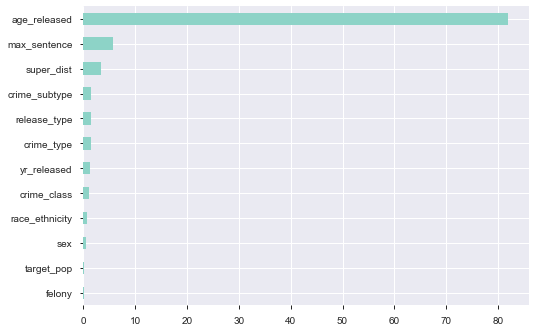

In [60]:
# Plotting Feature Importances
# important_feature_names = cb_clf.feature_names_
# important_feature_scores = cb_clf.feature_importances_

important_features = pd.Series(cb_clf.feature_importances_, index = cb_clf.feature_names_)
important_features.sort_values().plot(kind='barh')

### AUC-ROC Curve

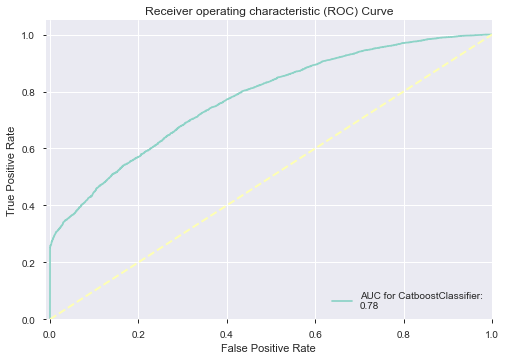

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
# from bs_ds.bs_ds import plot_a

y_test_pred = cb_clf.predict_proba(X_test)
plot_auc_roc_curve(y_test, y_test_pred)

### Confusion Matrix


Normalized confusion matrix
[[0.72691644 0.27308356]
 [0.34671937 0.65328063]]


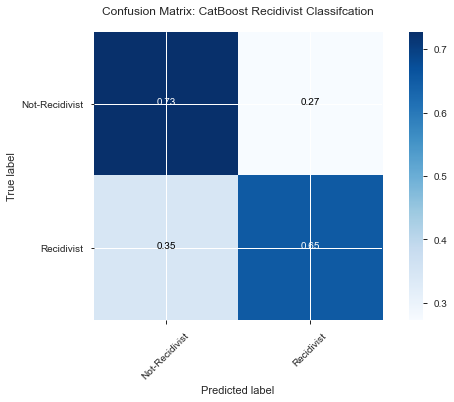

In [62]:
# import itertools
# from bs_ds.bs_ds import plot_confusion_matrix
y_test_pred = cb_clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_test_pred)

plot_confusion_matrix(conf_matrix, classes=['Not-Recidivist', 'Recidivist'], normalize=True, cmap='Blues',
                      title='Confusion Matrix: CatBoost Recidivist Classifcation\n')

In [65]:
import cufflinks as cf
cf.go_offline()

In [67]:
# df.iplot(kind='histogram',barmode='grouped',categories='recidivist',x='age_released')

### Using SHAP values to explain model

In [77]:
df.columns

Index(['level_0', 'index', 'yr_released', 'report_year', 'race_ethnicity',
       'age_released', 'crime_class', 'crime_type', 'crime_subtype',
       'release_type', 'super_dist', 'recidivist', 'target_pop', 'sex',
       'felony', 'crime_types_combined', 'crime_class_type_subtype',
       'max_sentence'],
      dtype='object')

In [90]:
def plot_hist_by_group(df, groupby_col='age_code',plot_col='recidivist',
                    barh=False, stacked=False, figsize=(8,6),label_map=None,title='Recidivism by Age',
                      xlabel='Group',rot=45):
    import pandas as pd
    import matplotlib.pyplot as plt
    
    font_dict= {}
    font_dict['title'] = {'size':18, 'family':'serif'}
    font_dict['ax_labels'] = {'size':16,'family':'serif'}
    font_dict['ticks'] = {'size':14,'family':'serif'}
    
    ## Get value counts as a dataframe
    counts = df.groupby(groupby_col)[plot_col].value_counts().unstack()
    counts.name='counts'
    counts = pd.DataFrame(counts)
    
    ## Map labels onto value_counts index
    if label_map is not None:
        counts[xlabel] = counts.index.to_series().apply(lambda x: label_map[x])
        counts.set_index(xlabel,inplace=True,drop=False)

    else:
        counts[xlabel] = counts.index.to_series()
        counts.set_index(xlabel,inplace=True,drop=True)        
    
    
    fig,ax=plt.subplots(figsize=figsize)
    ax.set_title(title,fontdict=font_dict['title'])

    if barh==False:
        counts.plot(kind='bar',stacked=stacked,ax=ax,rot=45)
        ax.set_ylabel('# of Prisoners', fontdict=font_dict['ax_labels'])
        ax.set_xlabel(xlabel,fontdict=font_dict['ax_labels'])
    else:
        counts.plot(kind='barh',stacked=stacked,ax=ax,rot=rot)
        ax.set_xlabel('# of Prisoners', fontdict=font_dict['ax_labels'])
        ax.set_ylabel(xlabel,fontdict=font_dict['ax_labels'])

    # ax.set_ylabel('# of Prisoners', fontdict=font_dict['ax_labels'])
    # ax.set_xlabel(xlabel,fontdict=font_dict['ax_labels'])
    ax.tick_params(labelsize= font_dict['ticks']['size'])

    plt.tight_layout()
    plt.show()
    return fig,ax

In [103]:
counts = pd.DataFrame(df.groupby('recidivist')['age_released'].value_counts(normalize=True))#.unstack()
counts = counts.rename(columns={'age_released':'Number'})
counts = counts.reset_index()
counts

,recidivist,age_released,Number
0,0,1,0.3509
1,0,2,0.2445
2,0,3,0.1815
3,0,0,0.1637
4,0,4,0.0593
5,1,1,0.3967
6,1,2,0.2355
7,1,0,0.1957
8,1,3,0.1433
9,1,4,0.0288


In [84]:
age_lookup = {v:k for k,v in age_map.items()}
age_lookup

{0: 'Under 25', 1: '25-34', 2: '35-44', 3: '45-54', 4: '55 and Older'}

In [106]:
counts['age_released'] = counts['age_released'].map(age_lookup)
counts

,recidivist,age_released,Number
0,0,25-34,0.3509
1,0,35-44,0.2445
2,0,45-54,0.1815
3,0,Under 25,0.1637
4,0,55 and Older,0.0593
5,1,25-34,0.3967
6,1,35-44,0.2355
7,1,Under 25,0.1957
8,1,45-54,0.1433
9,1,55 and Older,0.0288


In [109]:
print( counts['age_released'].values)

['25-34' '35-44' '45-54' 'Under 25' '55 and Older' '25-34' '35-44'
 'Under 25' '45-54' '55 and Older']


In [110]:
order = ['Under 25' ,'25-34', '35-44', '45-54' , '55 and Older']

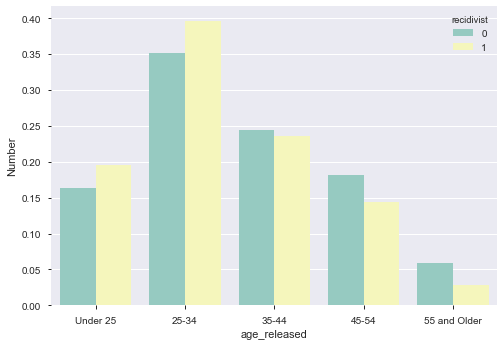

In [116]:
sns.barplot(y='Number',order=order,data=counts, x= 'age_released',hue='recidivist')

In [126]:
X_train.head()

,max_sentence,age_released,yr_released,race_ethnicity,crime_class,release_type,crime_type,crime_subtype,target_pop,sex,super_dist,felony
16186,0.1236,0.25,3,4,3,3,2,4,1,0,1,1
29559,0.0562,0.75,5,4,4,3,3,10,1,0,7,1
7579,0.1236,0.75,1,4,5,2,0,23,1,1,4,1
25617,0.0158,0.25,3,4,1,0,4,3,0,0,10,0
23855,0.0562,0.00,5,4,4,8,0,23,0,0,7,1


In [136]:
y_train.name

'recidivist'

In [164]:
corr = pd.concat([X_train,y_train],axis=1).corr()#@['recidivist'].plot(kind='barh')
corr

,max_sentence,age_released,yr_released,race_ethnicity,crime_class,release_type,crime_type,crime_subtype,target_pop,sex,super_dist,felony,recidivist
max_sentence,1.0000,0.1183,0.0105,0.0066,-0.1418,0.0239,-0.2493,0.2773,0.1175,-0.0306,-0.1387,0.2981,0.0109
age_released,0.1183,1.0000,0.0160,0.0556,0.0288,-0.0244,-0.0216,0.0069,-0.0255,0.0291,-0.0110,0.0188,-0.1074
yr_released,0.0105,0.0160,1.0000,0.0125,0.0214,0.1871,-0.0435,-0.0119,0.0171,0.0312,-0.2307,0.0095,0.0616
race_ethnicity,0.0066,0.0556,0.0125,1.0000,0.0027,0.0500,-0.0275,-0.0008,0.0213,0.0379,-0.0308,-0.0056,-0.0012
crime_class,-0.1418,0.0288,0.0214,0.0027,1.0000,-0.0182,-0.1449,-0.0095,0.0942,-0.0233,-0.1206,0.7268,-0.0163
release_type,0.0239,-0.0244,0.1871,0.0500,-0.0182,1.0000,0.0082,0.0982,0.3181,0.0054,-0.3139,-0.0242,0.0868
crime_type,-0.2493,-0.0216,-0.0435,-0.0275,-0.1449,0.0082,1.0000,-0.5121,-0.1193,-0.0497,0.1736,-0.2934,-0.0921
crime_subtype,0.2773,0.0069,-0.0119,-0.0008,-0.0095,0.0982,-0.5121,1.0000,0.0710,0.0144,-0.0977,0.1809,0.0289
target_pop,0.1175,-0.0255,0.0171,0.0213,0.0942,0.3181,-0.1193,0.0710,1.0000,0.0192,-0.5228,0.1615,0.1076
sex,-0.0306,0.0291,0.0312,0.0379,-0.0233,0.0054,-0.0497,0.0144,0.0192,1.0000,-0.0435,-0.0197,-0.0857


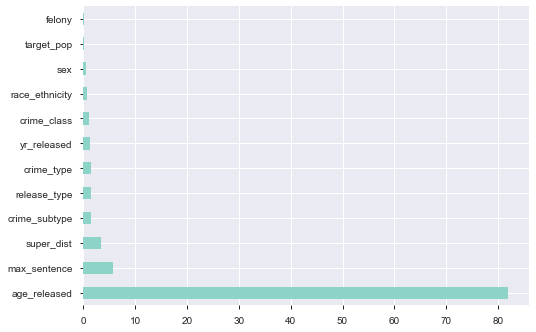

In [165]:
important_features = pd.Series(cb_clf.feature_importances_, index = cb_clf.feature_names_)
important = important_features.sort_values(ascending=False)
important.plot(kind='barh')

In [166]:
important.index

Index(['age_released', 'max_sentence', 'super_dist', 'crime_subtype',
       'release_type', 'crime_type', 'yr_released', 'crime_class',
       'race_ethnicity', 'sex', 'target_pop', 'felony'],
      dtype='object')

In [172]:
corr = corr['recidivist'].reset_index().T#[important.index].drop('recidivist')#.sort_index )#.plot(kind='barh')
corr.columns = corr.loc['index']
corr= corr.loc[important.index.to_series()]
# corr
# plt.show()
# Plotting Featuare Importances
# important_feature_names = cb_clf.feature_names_
# important_feature_scores = cb_clf.feature_importances_



KeyError: "None of [Index(['age_released', 'max_sentence', 'super_dist', 'crime_subtype',\n       'release_type', 'crime_type', 'yr_released', 'crime_class',\n       'race_ethnicity', 'sex', 'target_pop', 'felony'],\n      dtype='object')] are in the [index]"

In [124]:
df.corr()['recidivist'].plot(kind='barh')

,level_0,index,yr_released,report_year,age_released,recidivist,target_pop,sex,max_sentence
level_0,1.0000,0.9983,0.9840,0.9840,-0.0047,0.0807,0.0528,0.0386,0.0120
index,0.9983,1.0000,0.9855,0.9855,-0.0032,0.0808,0.0484,0.0386,0.0111
yr_released,0.9840,0.9855,1.0000,1.0000,0.0132,0.0791,0.0468,0.0377,0.0147
report_year,0.9840,0.9855,1.0000,1.0000,0.0132,0.0791,0.0468,0.0377,0.0147
age_released,-0.0047,-0.0032,0.0132,0.0132,1.0000,-0.0896,-0.0227,0.0216,0.1216
recidivist,0.0807,0.0808,0.0791,0.0791,-0.0896,1.0000,0.1148,-0.0329,0.0059
target_pop,0.0528,0.0484,0.0468,0.0468,-0.0227,0.1148,1.0000,0.0256,0.1108
sex,0.0386,0.0386,0.0377,0.0377,0.0216,-0.0329,0.0256,1.0000,-0.0273
max_sentence,0.0120,0.0111,0.0147,0.0147,0.1216,0.0059,0.1108,-0.0273,1.0000


In [87]:
res = df['age_released'].value_counts().reset_index()
res

,index,age_released
0,1,8876
1,2,5844
2,0,4229
3,3,4075
4,4,1182


In [88]:
res['age'] =res['index'].map(age_lookup)

In [89]:
res

,index,age_released,age
0,1,8876,25-34
1,2,5844,35-44
2,0,4229,Under 25
3,3,4075,45-54
4,4,1182,55 and Older


# CONCLUSIONS
- **After adjusting for imbalanced classes, the most important factor for determining recidivism are:**
    - **Age at Release**
    - **Supervising Judicial District**
    - **Release Type**
    - **Crime Subtype**
    
    
## Recommendatons
- This model could be used to predict which prisoners due for release may at the greatest risk for recidivism.<br><br>
    - Using this knowledge, the state of Iowa could put new programs into action that target those at high risk for recidivism and provide additional assistance and guidance following release.<br><br>
    - Additionally, there could be additional counseling or education _prior_ to release to supply the inmate with tools and options to avoid returning to a life of crime.
    
# FUTURE DIRECTIONS
- With more time and reliable performance, would perform cross-validation of our final model.<br><br>
- Additional visuals summarizing the underlying features effects on recidivism.<br><br>
- Adapting more available visualization tools to better display the underpinning of the model.
<br><br>
- Exploration of the predictability of crimes types committed by recidivists.

### POST-REVIEW SUGGESTIONS / IDEAS:
- [ ] Try using reduction instead of SMOTE.
- [ ] seaborn catplot bar graphs
- [ ] Add tree or other visuals
    - Try Mike's SHAP plots

In [68]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train,y_train)
help(clf)

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (default=100)
 |      The number of trees in the forest.
 |  
 |      .. versionchanged:: 0.22
 |         The default value of ``n_estimators`` changed from 10 to 100
 |         in 0.22.
 |  
 |  criterion : string, optional (default="gini")
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for th

In [74]:
clf.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=442041962, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1133142690, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, m

In [72]:
def visualize_tree(tree,feature_names=None,class_names=['0','1'],
                   kws={},save_filename=None,format_='png',save_and_show=False):
    """Visualizes a sklearn tree using sklearn.tree.export_graphviz"""
    from sklearn.tree import export_graphviz
    from IPython.display import SVG
    import graphviz #import Source
    from IPython.display import display
    
    if feature_names is None:
        feature_names=X_train.columns

    tree_viz_kws =  dict(out_file=None,rounded=True, rotate=False, filled = True)
    tree_viz_kws.update(kws)

    # tree.export_graphviz(dt) #if you wish to save the output to a dot file instead
    tree_data=export_graphviz(tree,feature_names=feature_names, 
                                   class_names=class_names,**tree_viz_kws)
    graph = graphviz.Source(tree_data,format=format_)#'png')
    
    if save_filename is not None:
        graph.render(save_filename)
        if save_and_show:
            display(graph)
        else:
            print(f'[i] Tree saved as {save_filename}.{format_}')
    else:
        display(graph)

## BOOKMARK: VISUALIZING TREES

In [76]:
visualize_tree(clf.estimators_[0],save_filename='tree_from_forest')

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.130656 to fit


[i] Tree saved as tree_from_forest.png


In [ ]:
compare_tree = sklearn.tree.DecisionTreeClassifier()
dir(compare_tree)

In [ ]:
compare_tree.fit(X_train, y_train)

In [ ]:
dir(compare_tree)

In [ ]:
# This is the tree object that sklearn generates and is looking for 
help(compare_tree.tree_)

In [ ]:
dir(cb_clf)

In [ ]:
help(cb_clf.get_metadata())

In [ ]:
test = cb_clf.get_metadata()

In [ ]:
help(cb_clf)

### SHAP values
https://github.com/jirvingphd/shap


In [ ]:
import shap
shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(cb_clf)

In [ ]:
shap_vals = explainer.shap_values(train_pool)

In [ ]:
shap.force_plot(explainer.expected_value, shap_vals[:1000],X_train[:1000])

In [ ]:
shap.summary_plot(shap_vals, X_train)

In [ ]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")